# Importando redes

\#NoAlVotoElectronico

In [1]:
import networkx as nx

In [2]:
graph = nx.read_graphml("../dataset/noalvc.graphml")
print("Order:",graph.order())
print("Size:",graph.size())

Order: 704
Size: 17951


In [3]:
print(nx.info(graph))

Name: 
Type: DiGraph
Number of nodes: 704
Number of edges: 17951
Average in degree:  25.4986
Average out degree:  25.4986


# Explorando subgrafos

In [4]:
import matplotlib.pyplot as plt

def draw_ego_graph(graph, character, hops=1):
    """
    Expecting a graph_from_gdf
    """
    # Get the Ego Graph and Position
    ego = nx.ego_graph(graph, character, hops)
    pos = nx.spring_layout(ego)
    plt.figure(figsize=(12,12))
    plt.axis('off')
    # Coloration and Configuration
    #ego.node[character]["TYPE"] = "center"
    #valmap = { "comic": 0.25, "hero": 0.54, "center": 0.87 }
    #types = nx.get_node_attributes(ego, "TYPE")
    #values = [valmap.get(types[node], 0.25) for node in ego.nodes()]

    # Draw
    nx.draw_networkx_edges(ego, pos, alpha=0.4)
    nx.draw_networkx_nodes(ego, pos, node_size=80, cmap=plt.cm.hot, with_labels=False)
    
    plt.show()

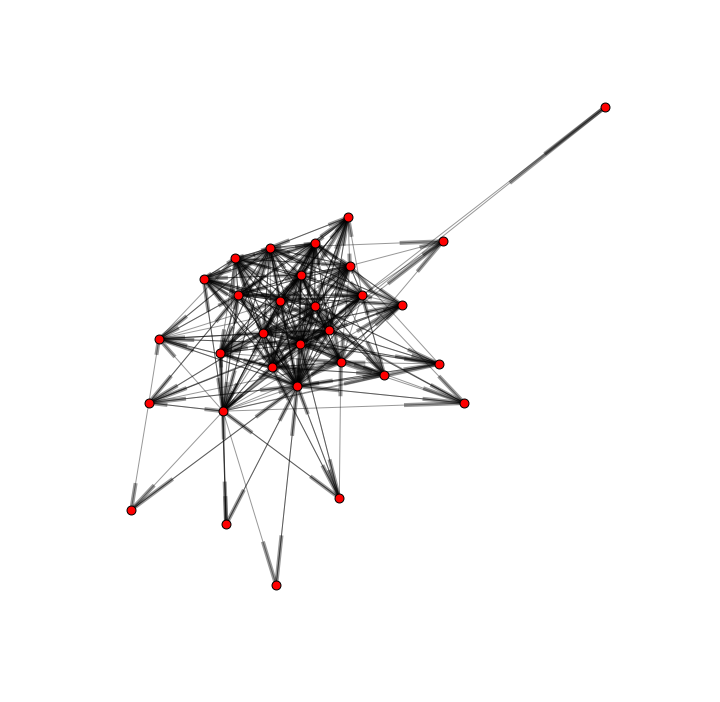

In [5]:
draw_ego_graph(graph, graph.nodes()[0] , hops=1)

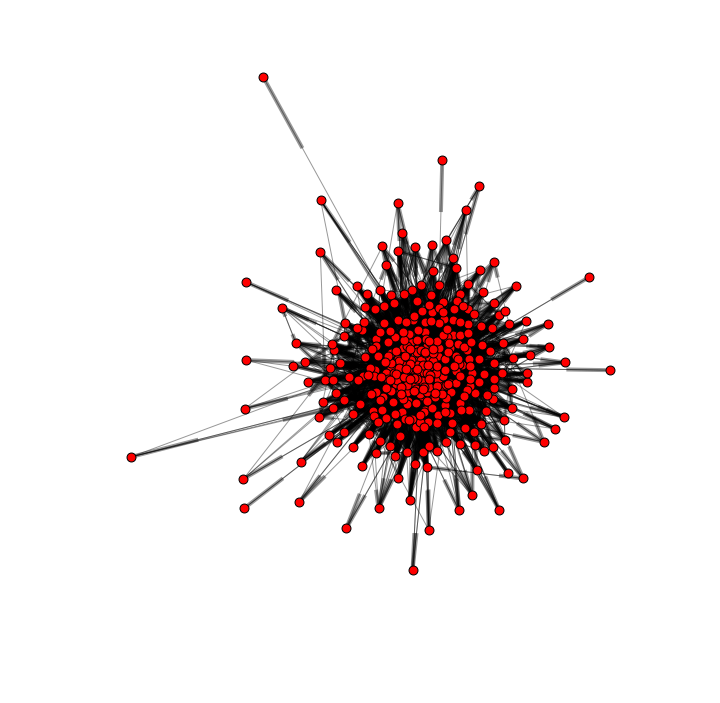

In [6]:
draw_ego_graph(graph, graph.nodes()[0] , hops=2)

## Buscando jugadores clave

In [7]:
import operator

In [8]:
degrees = sorted(graph.degree().items(), key=operator.itemgetter(1), reverse=True)

In [9]:
degrees[0:9]

[('704044332270096390', 538),
 ('1705649064', 394),
 ('158517384', 368),
 ('177612041', 365),
 ('703666177067884545', 361),
 ('2395547340', 359),
 ('555370464', 359),
 ('3297264748', 350),
 ('1228337593', 347)]

In [10]:
centrality = nx.degree_centrality(graph)
nx.set_node_attributes(graph, 'centrality', centrality)
degrees = sorted(centrality.items(), key=operator.itemgetter(1), reverse=True)
degrees[0:9]

[('704044332270096390', 0.7652916073968706),
 ('1705649064', 0.5604551920341394),
 ('158517384', 0.523470839260313),
 ('177612041', 0.519203413940256),
 ('703666177067884545', 0.5135135135135135),
 ('2395547340', 0.5106685633001423),
 ('555370464', 0.5106685633001423),
 ('3297264748', 0.49786628733997157),
 ('1228337593', 0.49359886201991465)]

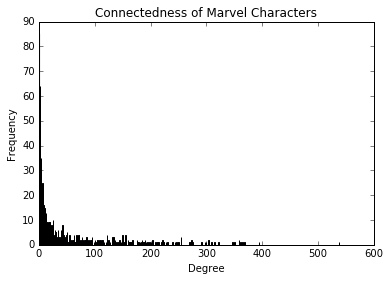

In [11]:
plt.hist(list(graph.degree().values()), bins=500)
plt.title("Connectedness of Marvel Characters")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In [12]:
def nbest_centrality(graph, metric, n=10, attribute="centrality", **kwargs):
    centrality = metric(graph, **kwargs)
    nx.set_node_attributes(graph, attribute, centrality)
    degrees = sorted(centrality.items(), key=operator.itemgetter(1), reverse=True)
    print("Top %i based on %s metric" % (n, metric.__name__))
    for idx, item in enumerate(degrees[0:n]):
        item = (idx+1,) + item
        print("%i. %s: %0.3f" % item)

In [13]:
nbest_centrality(graph, nx.degree_centrality)

Top 10 based on degree_centrality metric
1. 704044332270096390: 0.765
2. 1705649064: 0.560
3. 158517384: 0.523
4. 177612041: 0.519
5. 703666177067884545: 0.514
6. 2395547340: 0.511
7. 555370464: 0.511
8. 3297264748: 0.498
9. 1228337593: 0.494
10. 406196908: 0.458


In [14]:
nbest_centrality(graph, nx.betweenness_centrality, normalized=True)

Top 10 based on betweenness_centrality metric
1. 17028456: 0.090
2. 32401333: 0.090
3. 79239477: 0.086
4. 704044332270096390: 0.072
5. 87493550: 0.070
6. 1228337593: 0.042
7. 175914955: 0.039
8. 11456702: 0.037
9. 143685841: 0.032
10. 1705649064: 0.030


In [15]:
nbest_centrality(graph, nx.closeness_centrality)

Top 10 based on closeness_centrality metric
1. 704044332270096390: 0.443
2. 2395547340: 0.424
3. 1705649064: 0.423
4. 555370464: 0.421
5. 1228337593: 0.417
6. 158517384: 0.411
7. 753801836264624128: 0.410
8. 1301334254: 0.408
9. 703666177067884545: 0.405
10. 143685841: 0.403


In [16]:
nbest_centrality(graph, nx.eigenvector_centrality_numpy)

Top 10 based on eigenvector_centrality_numpy metric
1. 704044332270096390: 0.155
2. 1705649064: 0.142
3. 406196908: 0.139
4. 3297264748: 0.137
5. 2395547340: 0.134
6. 177612041: 0.133
7. 59787383: 0.131
8. 703666177067884545: 0.131
9. 56044829: 0.129
10. 440967655: 0.128


## Explorando características de redes

In [17]:
nx.density(graph)

0.03627109465925255

In [18]:
nx.density(nx.ego_graph(graph, graph.nodes()[0]))

0.41397849462365593

In [19]:
subgraphs = list(nx.connected_component_subgraphs(graph.to_undirected()))

In [20]:
for subgraph in subgraphs:
    print(subgraph.order())

685
1
1
1
1
1
1
4
1
1
1
1
1
1
1
1
1


> 685 de 704 usuarios que usan un hashtag estan relacionados entre sí (bueh, un nodo tiene más de 500 conexiones)

In [21]:
nx.write_graphml(subgraphs[0],"noalvc-connected.graphml")

## Clustering y detección de comunidades

In [22]:
import community

In [23]:
#graph = graph_from_csv(HERO_NETWORK)
partition = community.best_partition(subgraphs[0])
print("%i partitions" % len(set(partition.values())))
nx.set_node_attributes(graph, 'partition', partition)

4 partitions


In [24]:
from collections import defaultdict
d = defaultdict(list)
for key, value in partition.items():
    d[value].append(key)
[len(v) for k,v in d.items() ]

[300, 124, 111, 150]

In [25]:
def detect_communities(graph):
    partition = community.best_partition(graph.to_undirected())
    nx.set_node_attributes(graph, 'partition', partition)
    return graph, partition

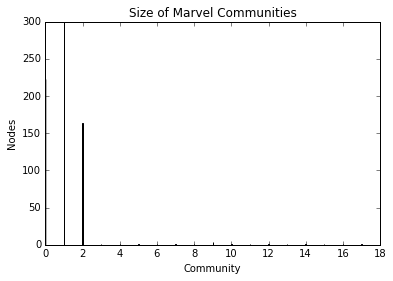

In [26]:
def communities_histogram(graph):
    graph, partition = detect_communities(graph)
    plt.hist(list(partition.values()), bins=len(partition.values()))#, color="#0f6dbc")
    plt.title("Size of Marvel Communities")
    plt.xlabel("Community")
    plt.ylabel("Nodes")
    plt.show()
    
communities_histogram(graph)

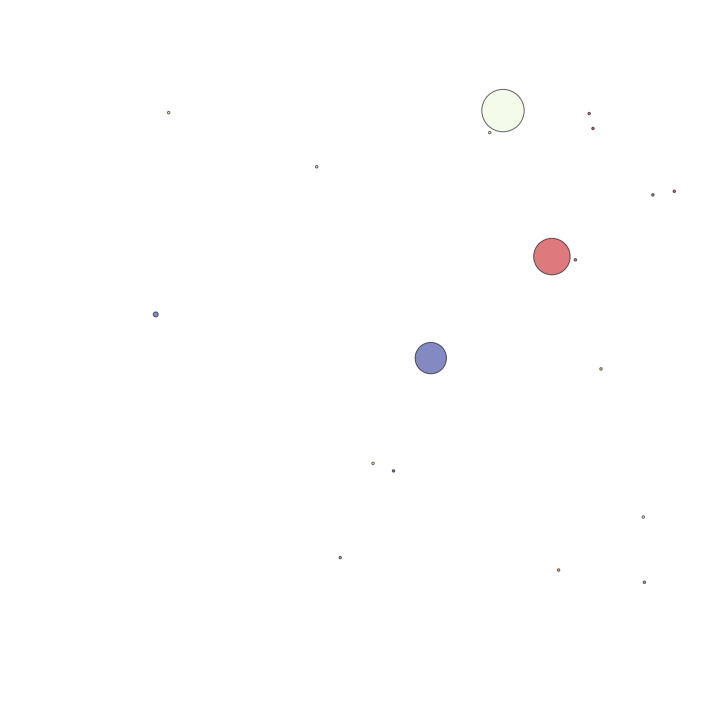

In [27]:
import random
from collections import defaultdict

def communities_bubblechart(graph):
    graph, partition = detect_communities(graph)
    parts = defaultdict(int)
    for part in partition.values():
        parts[part] += 1
    bubbles = nx.Graph()
    for part in parts.items():
        bubbles.add_node(part[0], size=part[1])
    pos = nx.random_layout(bubbles)
    plt.figure(figsize=(12,12))
    plt.axis('off')
    nx.draw_networkx_nodes(bubbles, pos, alpha=0.6, 
                           node_size=list(map(lambda x: x*6, parts.values())), 
                           node_color=[random.random() for x in parts.values()], 
                           cmap=plt.cm.RdYlBu)
    plt.show()
    
communities_bubblechart(graph)

In [28]:
nx.transitivity(graph)

0.3773165081282734

In [29]:
nx.average_clustering(graph.to_undirected())

0.45964582891252426

## Prediciendo conexiones

In [3]:
!linkpred ../dataset/noalvc.graphml ../dataset/noalvc_09_02.graphml -p CommonNeighbours DegreeProduct Jaccard Katz MaxOverlap NMeasure RootedPageRank -P ../config.yaml

08:47:45 - INFO - Reading file '../dataset/noalvc.graphml'...
08:47:45 - INFO - Successfully read file.
08:47:45 - INFO - Reading file '../dataset/noalvc_09_02.graphml'...
08:47:46 - INFO - Successfully read file.
08:47:46 - INFO - Starting preprocessing...
08:47:46 - INFO - Removed 15 nodes (degree < 1)
08:47:46 - INFO - Removed 14 nodes (degree < 1)
08:47:47 - INFO - Removed 4 nodes (not common)
08:47:47 - INFO - Removed 2 nodes (not common)
08:47:47 - INFO - Finished preprocessing.
08:47:49 - INFO - Executing CommonNeighbours...
08:47:52 - INFO - Finished executing CommonNeighbours.
08:47:56 - INFO - Executing DegreeProduct...
08:47:58 - INFO - Finished executing DegreeProduct.
08:48:08 - INFO - Executing Jaccard...
08:48:14 - INFO - Finished executing Jaccard.
08:48:17 - INFO - Executing Katz...
Computing matrix powers: [############################################################] 5/5
08:48:44 - INFO - Finished executing Katz.
08:48:51 - INFO - Executing MaxOverlap...
08:48:55 - I

In [4]:
!cat ../config.yaml

min_degree: 1
output:
- cache-predictions
- recall-precision
- roc


In [10]:
!find ../dataset/*-predictions_*.txt -print -exec head {} \;

../dataset/noalvc-CommonNeighbours-predictions_2017-09-07_08.47.txt
158517384	1228337593	110.0
555370464	4788557789	107.0
555370464	177612041	106.0
177612041	158517384	103.0
2984716645	143685841	100.0
860441228	1228337593	99.0
3297264748	208976888	98.0
186998381	143685841	98.0
3297264748	186998381	95.0
3434404877	143685841	93.0
../dataset/noalvc-DegreeProduct-predictions_2017-09-07_08.47.txt
555370464	177612041	31323.0
158517384	1228337593	29580.0
555370464	4788557789	28368.0
177612041	158517384	27666.0
860441228	1228337593	25670.0
734407194632945666	158517384	25056.0
734407194632945666	1228337593	24480.0
555370464	4822499295	24034.0
866370282319171584	555370464	23640.0
805052616015224832	555370464	23640.0
../dataset/noalvc-Jaccard-predictions_2017-09-07_08.48.txt
98821985	211187016	1.0
897977362985476096	724403105706725376	1.0
897977362985476096	187621580	1.0
836949255294173184	724403105706725376	1.0
836949255294173184	187621580	1.0
724403105706725376	187621580	1.0
724403105706725376	

In [13]:
!echo xdg-open `ls $PWD/../dataset/noalvc-recall-precision_2017-09-07_08.49.pdf`

xdg-open /home/gmiretti/workspace/my-projects/social-network-analysis-with-python/bitbucket/notebooks/../dataset/noalvc-recall-precision_2017-09-07_08.49.pdf
